## Adaptive scaling of total TEC for sub-orbital TEC

In [1]:
%matplotlib inline
import os
import string
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt, ticker, patches
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, utils as ut
from mintpy import add
from ipynb.fs.full import utils
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/topTEC')
os.chdir(work_dir)
print('Go to directory:', work_dir)

proj_dirs = [os.path.expanduser('~/data/geolocation/ChileSenAT149/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/ChileSenDT156/mintpy_offset'),
             os.path.expanduser('~/data/geolocation/KyushuAlos2DT23/mintpy_offset')]

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/topTEC


### Calculate

In [2]:
for proj_dir in proj_dirs:
    os.chdir(proj_dir)
    #!iono_tec.py timeseriesRg.h5 -g inputs/geometryRadar.h5 -s jpl
    #!iono_tec.py timeseriesRg.h5 -g inputs/geometryRadar.h5 -s jpl --ratio 0.69
    #!iono_tec.py timeseriesRg.h5 -g inputs/geometryRadar.h5 -s jpl --ratio adaptive
    #!iono_tec.py timeseriesRg.h5 -g inputs/geometryRadar.h5 -s cod
    #!iono_tec.py timeseriesRg.h5 -g inputs/geometryRadar.h5 -s cod --ratio 0.69
    #!iono_tec.py timeseriesRg.h5 -g inputs/geometryRadar.h5 -s cod --ratio adaptive
os.chdir(work_dir)

In [5]:
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    infile = os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5.h5')
    fbase = os.path.splitext(infile)[0]

    tbases = [
        'TECclr', 'TECclrR69', 'TECclrRA',
        'TECjlr', 'TECjlrR69', 'TECjlrRA',
        'TECjhr', 'TECjhrR69', 'TECjhrRA',
    ]

    for tbase in tbases:
        tec_file = os.path.join(proj_dir, 'inputs', f'{tbase}.h5')
        outfile = f'{fbase}_{tbase}.h5'
        if not os.path.isfile(outfile):
            cmd = f'{infile} {tec_file} -o {outfile}'
            print(f'add.py {cmd}')
            add.main(cmd.split())

In [7]:
proj_names = []
rDicts = []
for proj_dir in proj_dirs:
    suffix = '' if 'Alos2' in proj_dir else '_S1Bias'
    infile = os.path.join(proj_dir, f'timeseriesRg{suffix}_SET_ERA5.h5')
    fbase = os.path.splitext(infile)[0]
    fnames = [infile] + [f'{fbase}_{x}.h5' for x in tbases + ['TECsub']]
    proj_name, tsDict, rDict = utils.read_ts_files(fnames, print_msg=True, print_max=False)
    proj_names.append(proj_name)
    rDicts.append(rDict)

ChileSenAT149: RMSE
    SAR - S1Bias - SET - ERA5               :   18.1 cm
    SAR - S1Bias - SET - ERA5 - TECclr      :   21.2 cm
    SAR - S1Bias - SET - ERA5 - TECclrR69   :   19.9 cm
    SAR - S1Bias - SET - ERA5 - TECclrRA    :   18.5 cm
    SAR - S1Bias - SET - ERA5 - TECjlr      :   19.2 cm
    SAR - S1Bias - SET - ERA5 - TECjlrR69   :   18.4 cm
    SAR - S1Bias - SET - ERA5 - TECjlrRA    :   16.8 cm
    SAR - S1Bias - SET - ERA5 - TECjhr      :    6.4 cm
    SAR - S1Bias - SET - ERA5 - TECjhrR69   :    8.7 cm
    SAR - S1Bias - SET - ERA5 - TECjhrRA    :    7.5 cm
    SAR - S1Bias - SET - ERA5 - TECsub      :    4.9 cm
ChileSenDT156: RMSE
    SAR - S1Bias - SET - ERA5               :    5.7 cm
    SAR - S1Bias - SET - ERA5 - TECclr      :    5.1 cm
    SAR - S1Bias - SET - ERA5 - TECclrR69   :    5.1 cm
    SAR - S1Bias - SET - ERA5 - TECclrRA    :    5.1 cm
    SAR - S1Bias - SET - ERA5 - TECjlr      :    5.1 cm
    SAR - S1Bias - SET - ERA5 - TECjlrR69   :    4.9 cm
    SAR 

### Plot

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/topTEC/topTEC_scale_rmse.pdf


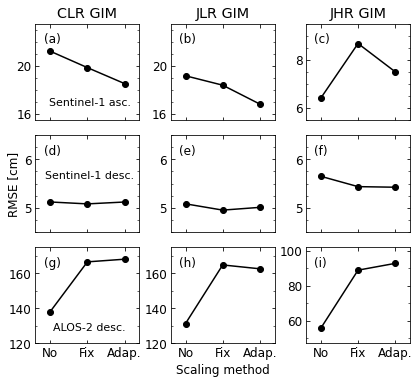

In [10]:
x = [0,1,2]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=[6, 5.5], sharex=True)
for i in range(3):
    tecs = list(rDicts[i].values())
    clr, jlr, jhr = tecs[1:4], tecs[4:7], tecs[7:10]
    for j, tec in enumerate([tecs[1:4], tecs[4:7], tecs[7:10]]):
        axs[i, j].plot(x, tec, 'o-', color='k')
# axis format
nums = ['(a)', '(b)', '(c)',
        '(d)', '(e)', '(f)',
        '(g)', '(h)', '(i)']
gnames = ['CLR GIM', 'JLR GIM', 'JHR GIM']
for i, ax in enumerate(axs.flatten()):
    ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True)
    ax.set_xlim(-0.4, 2.4)
    ax.annotate(f'{nums[i]}', xy=(0.08, 0.8), xycoords='axes fraction', ha='left')
for ax in axs[0,:2]:  ax.set_ylim(15.5, 23.5); ax.yaxis.set_major_locator(ticker.MultipleLocator(4));  ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
for ax in axs[0,2:]:  ax.set_ylim(5.5 , 9.5 ); ax.yaxis.set_major_locator(ticker.MultipleLocator(2));  ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
for ax in axs[1,: ]:  ax.set_ylim(4.5,  6.5 ); ax.yaxis.set_major_locator(ticker.MultipleLocator(1));  ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
for ax in axs[2,:2]:  ax.set_ylim(120 , 175 ); ax.yaxis.set_major_locator(ticker.MultipleLocator(20)); ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
for ax in axs[2,2:]:  ax.set_ylim(47  , 102 ); ax.yaxis.set_major_locator(ticker.MultipleLocator(20)); ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
for i in range(3):    axs[0,i].set_title(gnames[i])
axs[1,0].set_ylabel('RMSE [cm]')
#plt.xticks(x, ['no\nscale', 'scale\nw/\nfixed\nratio', 'scale\nw/\nadap.\nratio'])
plt.xticks(x, ['No', 'Fix', 'Adap.'])
axs[2,1].set_xlabel('Scaling method')
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
axs[0,0].annotate('Sentinel-1 asc.',  fontsize=11, xy=(0.52, 0.15), xycoords='axes fraction', ha='center')
axs[1,0].annotate('Sentinel-1 desc.', fontsize=11, xy=(0.52, 0.55), xycoords='axes fraction', ha='center')
axs[2,0].annotate('ALOS-2 desc.',     fontsize=11, xy=(0.52, 0.13), xycoords='axes fraction', ha='center')

# outputs
out_fig = os.path.join(work_dir, 'topTEC_scale_rmse.pdf')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

Take home message:

1. For Sentinel-1, scaling is better than no scaling, except for JHR GIM at Sentinel-1 ascending orbit.
2. For Sentinel-1, adaptive scaling is better than fixed scaling
3. For ALOS-2, different altitude, different local time, applying ratio get worse